# Query atlas.brabant.nl

See https://atlas.brabant.nl/arcgis/rest/services for list of available datasources.

Arcgis Python API: https://developers.arcgis.com/python/

## Libraries

In [73]:
import pandas as pd
from arcgis.mapping import MapImageLayer
from arcgis.features import SpatialDataFrame
import geopandas as gpd

## Retrieve data and store as shapefiles

In [127]:
def get_arcgis_data(base_url="https://atlas.brabant.nl/arcgis/rest/services",
                    service_name="stortplaatsen",
                    layer_number=4,
                    output_dir=None,
                    verbose=False):
    """
    Retrieves data from ArcGIS MapServer, selects layer and converts to 
    spatial dataframe. Optionally saves results to shapefile.
    
    Arguments:
        base_url:     arcgis base url (usually ending with 'services')
        service_name: name of arcgis service provided (usually visible when accessing base_url in browser)
        layer_number: number of layer to select.
        output_dir:   Optional directory for results. Output shapefiles stored in subdir with name of service_name.
        verbose:      If True, show intermediate steps.
        
    Returns:
        Spatial dataframe with results
    """
    
    mapserver_url = "%s/%s/MapServer" % (base_url, service_name)

    if verbose:
        print("Querying url: %s" % mapserver_url)
    map_image_layer = MapImageLayer(mapserver_url)
    
    if verbose:
        print("Available layers:")
        for layer in map_image_layer.layers:
            print(layer.properties['name'])
        
    # Create spatial dataframe from layer
    layer = map_image_layer.layers[layer_number]
    sdf = pd.DataFrame.spatial.from_layer(layer)
        
    # Save spatial dataframe to shapefile
    layer_name = layer.properties['name']
    if output_dir is not None:
        output_file = "%s/%s/%s.shp" % (output_dir, service_name, layer_name)
        if verbose:
            print("Saving layer %s to shapefile: %s" % (layer_number, output_file))
        sdf.spatial.to_featureclass(location=output_file)
    
    return sdf

In [128]:
get_arcgis_data(base_url='https://atlas.brabant.nl/arcgis/rest/services',
                service_name='stortplaatsen',
                layer_number=4,
                output_dir='../results',
                verbose=True)

Querying url: https://atlas.brabant.nl/arcgis/rest/services/stortplaatsen/MapServer
Available layers:
0 labels code Voormalige stortplaatsen
1 labels naam Voormalige stortplaatsen
2 Voormalige stortplaatsen punt
3 Voormalige stortplaatsen outline
4 Voormalige stortplaatsen vlak
5 Voormalige stortplaatsen info
6 kadastrale percelen
Saving layer 4 to shapefile: ../results/stortplaatsen/4 Voormalige stortplaatsen vlak.shp


,OBJECTID,FINABO,NAAM,PLAATS,GEMEENTE,GLOBISNR,STRABISLOC,STRABISRAP,ONDERZKN,CENTROID_X,...,VOS_NM,AROS_NM,NAVOS_NM,RB_NM,VD_NM,VH_NM,VG_NM,OV_NM,STATUS_HGB,SHAPE
0,1,NB1550007,Acht Noord,Eindhoven,Eindhoven,NB077200007,XX077200002,XX077200002,V1,156525.535658,...,NB1550007_NB077200007_VOS.pdf,niet_beschikbaar.html,niet_beschikbaar.html,niet_beschikbaar.html,niet_beschikbaar.html,niet_beschikbaar.html,niet_beschikbaar.html,niet_beschikbaar.html,Volledig hergebruikt,"{'rings': [[[155962.69, 388022.9, 0, 0], [1559..."
1,2,NB6000016,Gansoyensesteeg 20,Waalwijk,Waalwijk,NB086700016,XX086700595,XX086700848,V1,133476.011868,...,NB6000016_NB086700016_VOS.pdf,niet_beschikbaar.html,niet_beschikbaar.html,niet_beschikbaar.html,niet_beschikbaar.html,niet_beschikbaar.html,niet_beschikbaar.html,niet_beschikbaar.html,Standaard,"{'rings': [[[133278.284, 413450.28, 0, 0], [13..."
2,3,NB2900006,Castersedijk,Hoogeloon,Bladel,NB172800047,XX172800074,XX172800078,V1,144833.445933,...,NB2900006_NB172800047_VOS.pdf,niet_beschikbaar.html,niet_beschikbaar.html,niet_beschikbaar.html,niet_beschikbaar.html,niet_beschikbaar.html,niet_beschikbaar.html,niet_beschikbaar.html,Volledig hergebruikt,"{'rings': [[[144849.175, 376424.251, 0, 0], [1..."
3,4,NB1300005,Eindsestraat,Dongen,Dongen,NB076600005,XX076600104,XX076600120,V1,126704.549507,...,NB1300005_NB076600005_VOS.pdf,niet_beschikbaar.html,niet_beschikbaar.html,niet_beschikbaar.html,niet_beschikbaar.html,niet_beschikbaar.html,niet_beschikbaar.html,niet_beschikbaar.html,Standaard,"{'rings': [[[126706.18100000001, 402500.435, 0..."
4,5,NB2700043,Breehees,Hilvarenbeek,Goirle,NB079800043,XX079800072,XX079800072,V1 / A / N1 / N2,132563.129851,...,NB2700043_NB079800043_VOS.pdf,NB2700043_NB079800043_AROS.pdf,NB2700043_NB079800043_NAVOS.pdf,NB2700043_NB079800043_RB.pdf,niet_beschikbaar.html,niet_beschikbaar.html,niet_beschikbaar.html,niet_beschikbaar.html,Standaard,"{'rings': [[[132550.141, 389975.124, 0, 0], [1..."
5,6,NB5450048,Oud lovenstraat,Tilburg,Tilburg,NB085500048,XX085500017,XX085500017,V1 / A / N1 / N2,136210.550816,...,NB5450048_NB085500048_VOS.pdf,NB5450048_NB085500048_AROS.pdf,NB5450048_NB085500048_NAVOS.pdf,NB5450048_NB085500048_RB.pdf,niet_beschikbaar.html,niet_beschikbaar.html,niet_beschikbaar.html,niet_beschikbaar.html,Standaard,"{'rings': [[[136249.677, 397741.773, 0, 0], [1..."
6,7,NB0600908,Verhoeven,Berkel-Enschot,Oisterwijk,NB082400057,XX085500012,XX085500012,V1 / A / N1 / N2,137877.379085,...,NB0600908_NB082400057_VOS.pdf,NB0600908_NB082400057_AROS.pdf,NB0600908_NB082400057_NAVOS.pdf,NB0600908_NB082400057_RB.pdf,niet_beschikbaar.html,niet_beschikbaar.html,niet_beschikbaar.html,niet_beschikbaar.html,Standaard,"{'rings': [[[137728.134, 397046.773, 0, 0], [1..."
7,8,NB2200002,Roonsestraat,Haaren,Haaren,NB078800002,XX078800128,XX078800147,V1 / A / N1 / N2,144481.084358,...,NB2200002_NB078800002_VOS.pdf,NB2200002_NB078800002_AROS.pdf,NB2200002_NB078800002_NAVOS.pdf,NB2200002_NB078800002_RB.pdf,niet_beschikbaar.html,niet_beschikbaar.html,niet_beschikbaar.html,niet_beschikbaar.html,Standaard,"{'rings': [[[144459.37, 402479.394, 0, 0], [14..."
8,9,NB1500006,Hint,Eersel,Eersel,NB077000006,XX077000128,XX077000151,V1 / A / N1 / N2,149646.818375,...,NB1500006_NB077000006_VOS.pdf,NB1500006_NB077000006_AROS.pdf,NB1500006_NB077000006_NAVOS.pdf,NB1500006_NB077000006_RB.pdf,niet_beschikbaar.html,niet_beschikbaar.html,niet_beschikbaar.html,niet_beschikbaar.html,Volledig hergebruikt,"{'rings': [[[149579.393, 375086.575, 0, 0], [1..."
9,10,NB3950002,'t Ven,Oirschot,Oirschot,NB082300002,XX082300171,XX082300187,V1 / A / N1 / N2,147746.170875,...,NB3950002_NB082300002_VOS.pdf,NB3950002_NB082300002_AROS.pdf,NB3950002_NB082300002_NAVOS.pdf,NB3950002_NB082300002_RB.pdf,niet_beschikbaar.html,niet_beschikbaar.html,niet_beschikbaar.html,niet_beschikbaar.html,Standaard,"{'rings': [[[147693.619, 393152.553, 0, 0], [1..."


## Visualize using geopandas

In [130]:
gdf_stortplaatsen = gpd.read_file('../results/stortplaatsen/4 Voormalige stortplaatsen vlak.shp')
gdf_stortplaatsen.head(3)

,OBJECTID,FINABO,NAAM,PLAATS,GEMEENTE,GLOBISNR,STRABISLOC,STRABISRAP,ONDERZKN,CENTROID_X,...,VOS_NM,AROS_NM,NAVOS_NM,RB_NM,VD_NM,VH_NM,VG_NM,OV_NM,STATUS_HGB,geometry
0,1,NB1550007,Acht Noord,Eindhoven,Eindhoven,NB077200007,XX077200002,XX077200002,V1,156525.535658,...,NB1550007_NB077200007_VOS.pdf,niet_beschikbaar.html,niet_beschikbaar.html,niet_beschikbaar.html,niet_beschikbaar.html,niet_beschikbaar.html,niet_beschikbaar.html,niet_beschikbaar.html,Volledig hergebruikt,"POLYGON ((155962.690 388022.900, 155963.258 38..."
1,2,NB6000016,Gansoyensesteeg 20,Waalwijk,Waalwijk,NB086700016,XX086700595,XX086700848,V1,133476.011868,...,NB6000016_NB086700016_VOS.pdf,niet_beschikbaar.html,niet_beschikbaar.html,niet_beschikbaar.html,niet_beschikbaar.html,niet_beschikbaar.html,niet_beschikbaar.html,niet_beschikbaar.html,Standaard,"POLYGON ((133278.284 413450.280, 133284.004 41..."
2,3,NB2900006,Castersedijk,Hoogeloon,Bladel,NB172800047,XX172800074,XX172800078,V1,144833.445933,...,NB2900006_NB172800047_VOS.pdf,niet_beschikbaar.html,niet_beschikbaar.html,niet_beschikbaar.html,niet_beschikbaar.html,niet_beschikbaar.html,niet_beschikbaar.html,niet_beschikbaar.html,Volledig hergebruikt,"POLYGON ((144849.175 376424.251, 144859.953 37..."


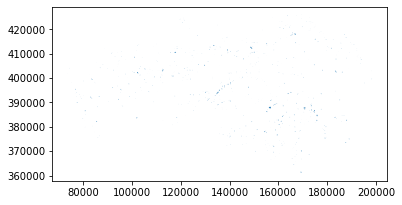

In [90]:
gdf_stortplaatsen.plot()